In [1]:
file_name = '../input/SMSSpamCollection'


In [2]:
with open(file=file_name, mode='r') as file:
    data = file.readlines()

data

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv\n",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.\n',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call

In [3]:
import pandas as pd
df = pd.read_csv(file_name, sep='\t', header=None, names=['label', 'text'])


<Axes: xlabel='count', ylabel='label'>

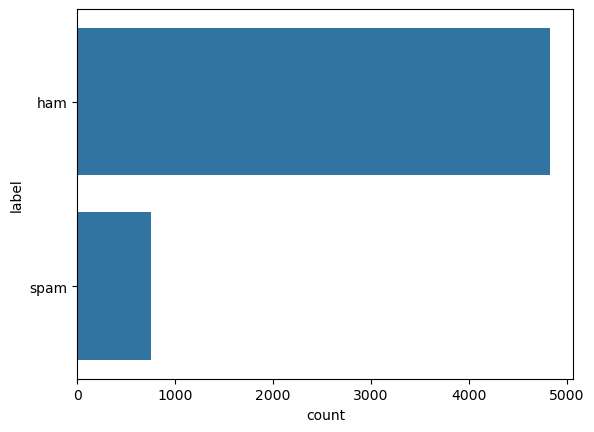

In [4]:
import seaborn as sns

sns.countplot(df['label'])

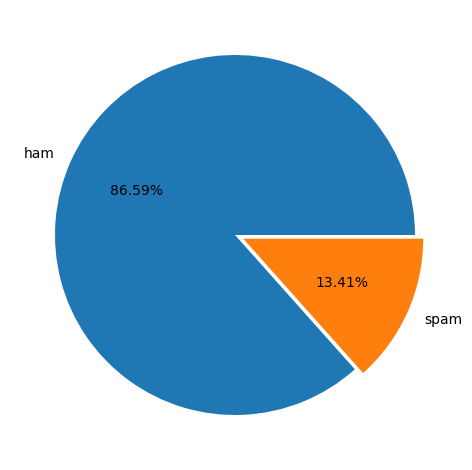

In [5]:
import matplotlib.pyplot as plt
data = df['label'].value_counts()
plt.pie(data.values, explode=[0, 0.05], autopct='%2.2f%%', labels=data.index)
plt.tight_layout()

In [6]:
# input variable
x = df['text']

# output variable
y = df['label']

1. Remove punctuation
2. remove stopwords
3. lemmatization (needs PoS tagging)

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

In [8]:
swords = stopwords.words('english')
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [9]:

# cleaning function
def clean_text(sent: str):
    # tokenize 
    tokens1 = word_tokenize(sent)
    # remove punctuation and numbers:
    tokens2 = [token for token in tokens1 if token.isalpha()]
    # remove stopwords and stem the output
    tokens3 = [ps.stem(token.lower()) for token in tokens2 if token.lower() not in swords]
    return tokens3


In [10]:
sent = 'Hello friends! How are you? Welcome to Python Programming.'
clean_text(sent)

['hello', 'friend', 'welcom', 'python', 'program']

Not using stemming because it removed e from welcome. Bad choice grim paaji

In [11]:

# # cleaning function
# def clean_text(sent: str):
#     # tokenize 
#     tokens1 = word_tokenize(sent)
#     # remove punctuation and numbers:
#     tokens2 = [token for token in tokens1 if token.isalpha()]
#     # remove stopwords
#     tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]

#     # lemmatizing the output
#     tags = pos_tag(tokens3)
#     tokens4 = []
#     for word in tags:
#         if word[1].startswith('N'):
#             tokens4.append(wnl.lemmatize(word[0], pos='n'))
#         elif word[1].startswith('V'):
#             tokens4.append(wnl.lemmatize(word[0], pos='v'))
#         elif word[1].startswith('J'):
#             tokens4.append(wnl.lemmatize(word[0], pos='a'))
#         else:
#             tokens4.append(word[0])


#     return tokens4


In [12]:
clean_text(sent)

['hello', 'friend', 'welcom', 'python', 'program']

Use word cloud to which words are common in a class

In [13]:
# pip install wordcloud

In [14]:
# separating ham and spam messages

ham = x[y=='ham']
spam = x[y=='spam']

In [15]:
ham

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [16]:
spam

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object

In [17]:
# ham_msgs = ''.join(list(ham))       #--->     CAN DO THIS ALSO
# spam_msgs = ''.join(list(spam))

ham_msgs = ham.sum()
spam_msgs = spam.sum()

In [18]:
ham_msgs

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if that\x92s the way u feel. That\x92s the way its g

In [19]:
len(spam_msgs), len(ham_msgs)

(103587, 344903)

In [20]:
from wordcloud import WordCloud


In [21]:
wc_spam = WordCloud(max_words=100).generate(spam_msgs)
wc_ham = WordCloud(max_words=100).generate(ham_msgs)

In [22]:
plt.rcParams['figure.dpi'] = 100

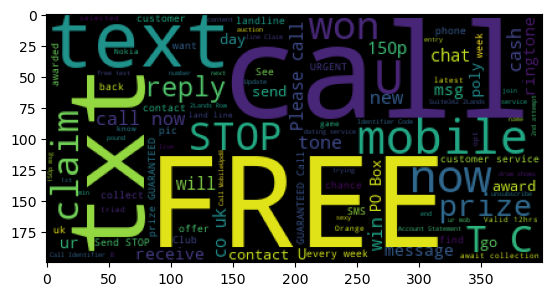

In [23]:

plt.figure()
plt.imshow(wc_spam)

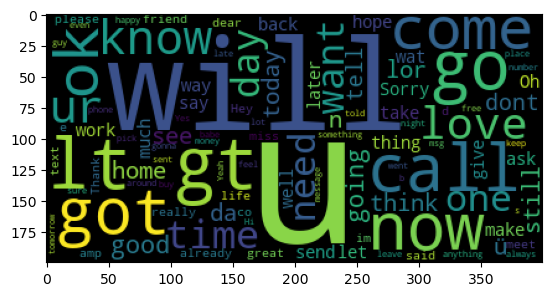

In [24]:
plt.figure()
plt.imshow(wc_ham)

In [25]:
type(x)

pandas.core.series.Series

In [26]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [27]:
# now vectorization 
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer(analyzer=clean_text) # first apply clean text and then get test result

In [29]:
x_vect = tfidf.fit_transform(x)
x_vect.shape

(5572, 5925)

In [30]:
# Cross validation

from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4179, 5925), (1393, 5925), (4179,), (1393,))

DEFAULT RANDOM STATE IS NONE AND TEST SPLIT SIZE IS 0.25

In [32]:
# build model
from sklearn.svm import SVC

In [33]:
svm = SVC(kernel='linear')

In [34]:
svm.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [35]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.9827709978463748


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [37]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.9813352476669059
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       1.00      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [38]:
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.949748743718593
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1208
        spam       1.00      0.62      0.77       185

    accuracy                           0.95      1393
   macro avg       0.97      0.81      0.87      1393
weighted avg       0.95      0.95      0.94      1393



In [39]:
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
x_test

accuracy: 0.9798994974874372
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.98      0.87      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11166 stored elements and shape (1393, 5925)>

In [40]:
file = open('../input/sample.csv', 'r')
data = file.readlines()
file.close()
data = pd.Series(data)
type(data)

pandas.core.series.Series

In [41]:
# data = data.apply(clean_text)
# type(data)
data = tfidf.transform(data)



In [42]:
svm.predict(data)

array(['ham', 'spam', 'ham'], dtype=object)

# 4/12/25
# joblib


In [43]:
import joblib

In [44]:
joblib.dump(svm, 'classifier.model')

['classifier.model']

In [45]:
joblib.dump(tfidf, 'preprocessor.model')

['preprocessor.model']